<a href="https://colab.research.google.com/github/ankit-verma2000/Projects/blob/main/WALMART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Walmart - Confidence Interval and CLT**

COLAB LINK:

https://colab.research.google.com/drive/1qeD8tpbvS-6t6xt-RoSyhKlOL4IFpKQf?usp=sharing

**About Walmart:**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.




**Business Problem Statement:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



In [ ]:
# Import all the ncessary library used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [ ]:
# Load the netflix dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# Data analysis steps like checking the structure & characteristics of the dataset

In [ ]:
# #Total number of elemnts this dataframe contains
df.size

5500680

In [ ]:
# It shows the count of the no.of row and columns present in dataframe
df.shape

(550068, 10)

In [ ]:
# Dimension pf the datsframe
df.ndim

2

In [ ]:
# Top 5 rows of the dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Last 5 rows of the dataframe
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# All the columns present in the dataframe
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# Its gave the information about the basic statistics of variables or the descriptive statistics of the data(also known to be 5 number summary)
df.describe(include= 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#MISSING VALUE(HANDLING)
*(DATA PREPROCESSING) OR (DATA CLEANING)*

In [ ]:
#total number of missing value availabe in the dataframe
df.isna().sum().sum()

0

In [ ]:
#check for missing values in every columns
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

CONCLUSION:

So,we can clearly see that this dataset contain no null values or missing values.

# OUTLIERS DETECTION

In [ ]:
# By seeing the variation between 50 percentile and mean we can also detect the outliers
describe = df.describe().loc[['mean','50%']]
describe

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
mean,1.003029e+06,8.076707,0.409653,5.40427,9263.968713
50%,1.003077e+06,7.000000,0.000000,5.00000,8047.000000


In [ ]:
# Difference between mean and meadian
diff = abs(describe.loc['mean'] - describe.loc['50%'])
diff = diff.reset_index()
diff.rename({'index':'Columns',0:'DIfferences'},axis = 1)

,Columns,DIfferences
0,User_ID,48.157599
1,Occupation,1.076707
2,Marital_Status,0.409653
3,Product_Category,0.404270
4,Purchase,1216.968713


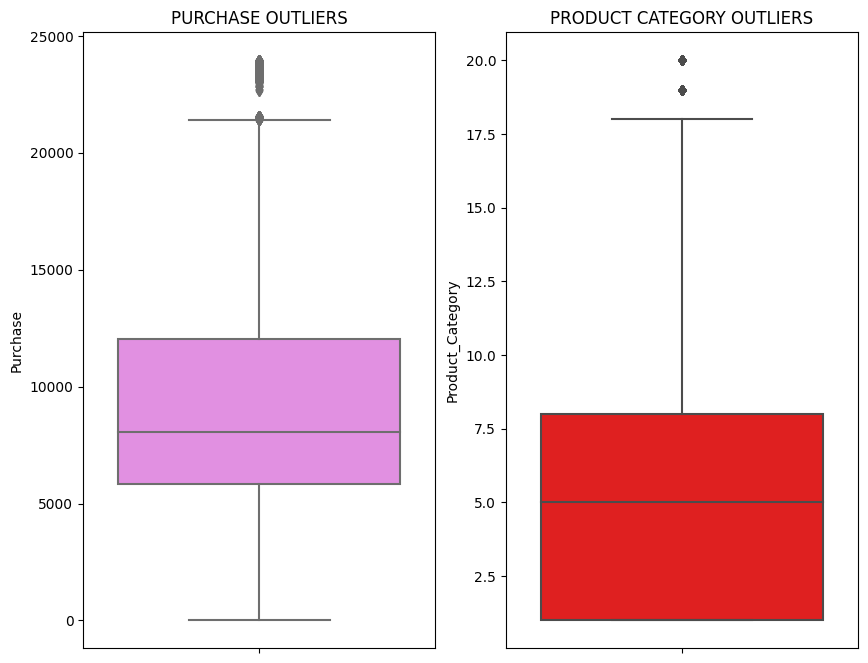

In [ ]:
# Outliers detection using box plot:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

sns.boxplot(data=df, y='Purchase', ax=ax[0], color ='violet').set_title('PURCHASE OUTLIERS')
sns.boxplot(data=df, y='Product_Category', ax=ax[1], color ='red').set_title('PRODUCT CATEGORY OUTLIERS')

plt.show()

**CONCLUSION:**

WE CAN CONCLUDE THAT OUTLIERS ARE PRESENT IN THE DATAFRAME IN PURCHASE COLUMN (A SIGNIFICANT NUMBER IS PRESENT IN THIS PURCAHSE COLUMN) AND IN PRODUCT CATEGORY (AN INSIGNIFICANT NUMBER IS PRESENT IN THE COLUMN TO BE NOTICED)

# NON - GRAPHICAL ANALYSIS (VALUE COUNTS AND UNIQUE ATTRIBUTES)

In [ ]:
df[:2]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [ ]:
# calculate value counts for multiple columns like in following
columns = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']

val_count = df[columns].melt().groupby(['variable','value'])['value'].count()/len(df)
val_count = val_count.to_frame()
val_count

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

In [ ]:
# Unique element present in the dataframe
columns = ['Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']
for col in columns:
  uni_col = df[col].unique()
  print('No. of unique elemnt in',col,'column is:',df[col].nunique())
  print(col,':', uni_col)

No. of unique elemnt in Product_ID column is: 3631
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
No. of unique elemnt in Gender column is: 2
Gender : ['F' 'M']
No. of unique elemnt in Age column is: 7
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
No. of unique elemnt in Occupation column is: 21
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
No. of unique elemnt in City_Category column is: 3
City_Category : ['A' 'C' 'B']
No. of unique elemnt in Stay_In_Current_City_Years column is: 5
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
No. of unique elemnt in Marital_Status column is: 2
Marital_Status : [0 1]


# UNIVARIATE ANALYSIS

<Axes: xlabel='Purchase', ylabel='Count'>

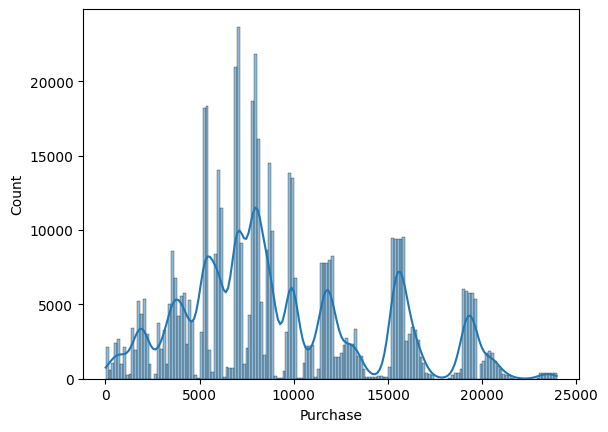

In [ ]:
sns.histplot(df['Purchase'],kde =True)

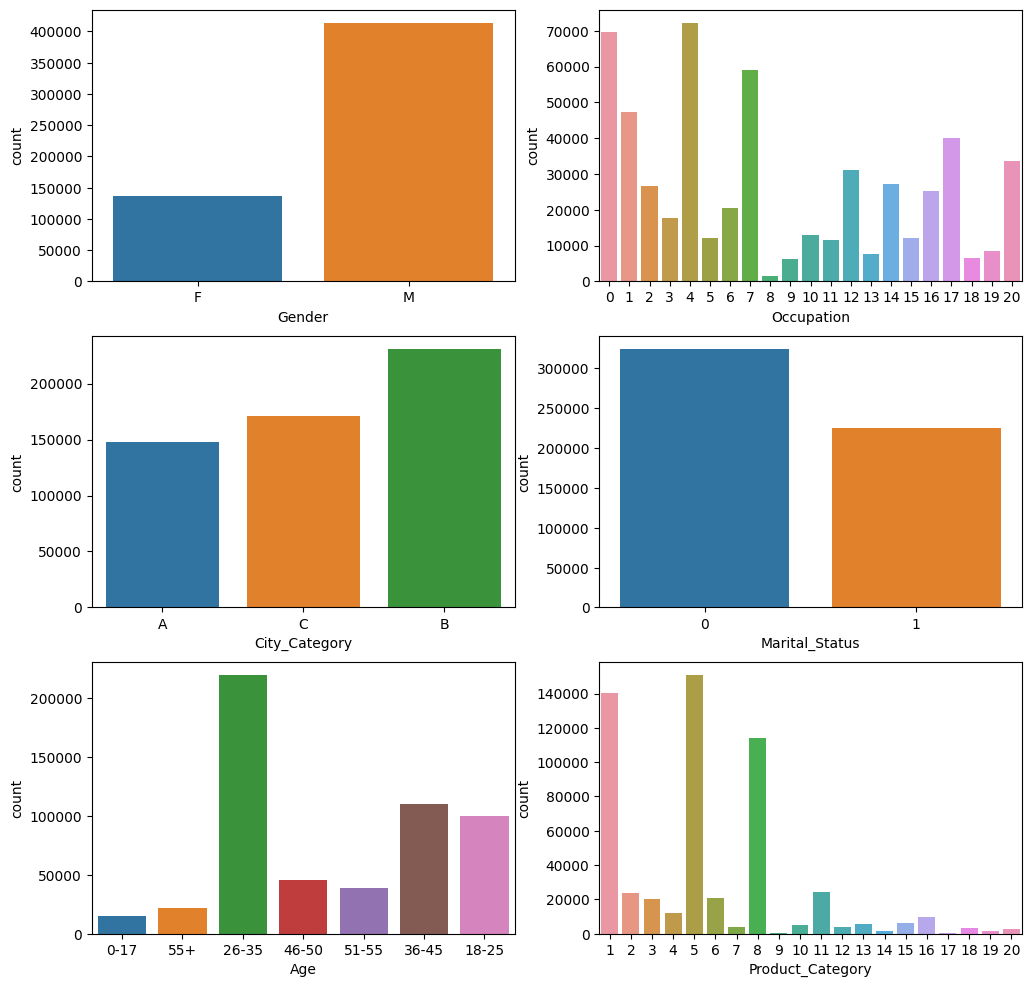

In [ ]:
# Univariate analysis for the all the categorical columns
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
sns.countplot(data=df, x='Gender', ax=axis[0,0])
sns.countplot(data=df, x='Occupation', ax=axis[0,1])
sns.countplot(data=df, x='City_Category', ax=axis[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axis[1,1])
sns.countplot(data = df, x ='Age', ax=axis[2,0])
sns.countplot(data = df, x='Product_Category', ax=axis[2,1])

plt.show()

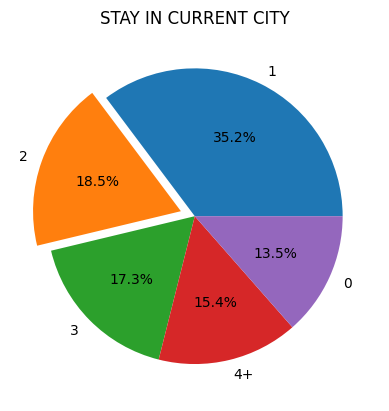

In [ ]:
plt.pie(df['Stay_In_Current_City_Years'].value_counts(),explode = (0, 0.1, 0, 0,0),autopct='%1.1f%%',labels =df['Stay_In_Current_City_Years'].value_counts().index)
plt.title("STAY IN CURRENT CITY")
plt.show()

**CONCLUSION**:

* Most of the users are Male
* There are 20 different types of Occupation and as well as for Product_Category
* More users belong to B City_Category
* More users are Single as compare to Married
* Most of the users belongs to 26-35 age group
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.
* Most of the user stay in current city is of for 1 year.




**BIVARIATE ANALYSIS**

AS MENTION IN OUR BUSINESS PROBLEM THAT WE WANT TO CALCULATE THE PURCHASE BEHAVIOUR AGAINST VARIOUS FACTORS SO WE CAN FIND THE PUCHASE VS ALL OTHER COLUMNS TO FIND THE BEHAVIOURAL PATTERN IN CUSTOMERS?


In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


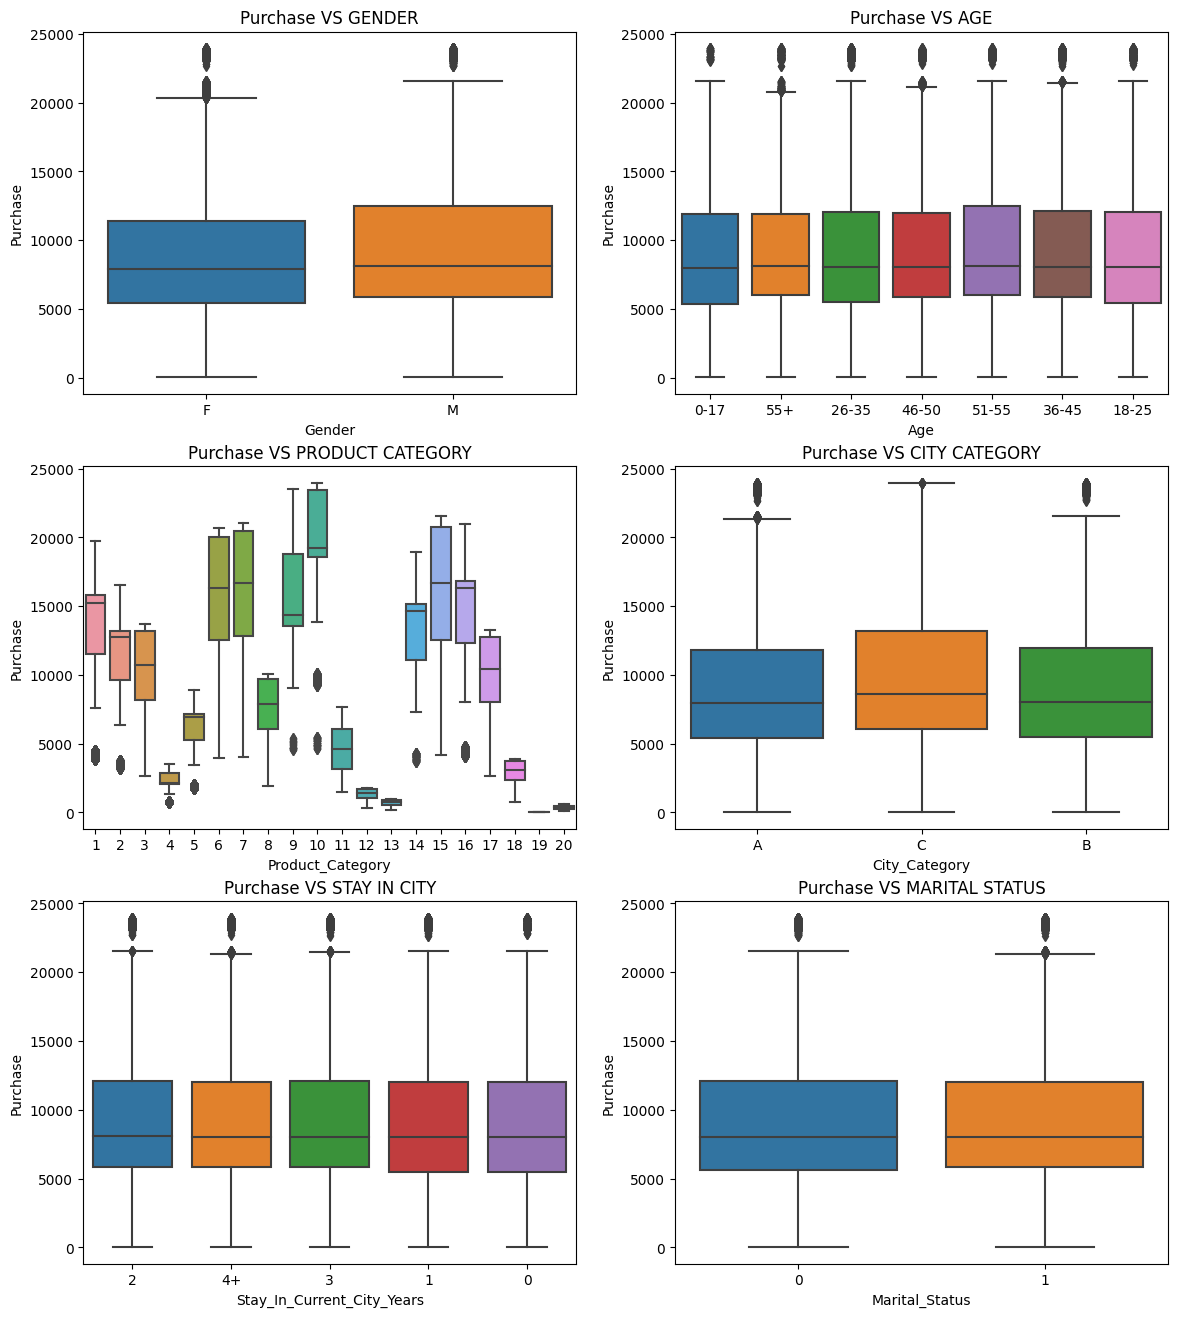

In [ ]:
analysis = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
fig, ax = plt.subplots(nrows = 3,ncols = 2, figsize= (14,16))
sns.boxplot(data = df,x= 'Gender',y='Purchase',ax=ax[0,0]).set_title('Purchase VS GENDER')
sns.boxplot(data = df,x= 'Age',y='Purchase',ax=ax[0,1]).set_title('Purchase VS AGE')
sns.boxplot(data = df,x= 'Product_Category',y='Purchase',ax=ax[1,0]).set_title('Purchase VS PRODUCT CATEGORY')
sns.boxplot(data = df,x= 'City_Category',y='Purchase',ax=ax[1,1]).set_title('Purchase VS CITY CATEGORY')
sns.boxplot(data = df,x= 'Stay_In_Current_City_Years',y='Purchase',ax=ax[2,0]).set_title('Purchase VS STAY IN CITY')
sns.boxplot(data = df,x= 'Marital_Status',y='Purchase',ax=ax[2,1]).set_title('Purchase VS MARITAL STATUS')

plt.show()


**MULTIVARIATE ANALYSIS**

In [ ]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


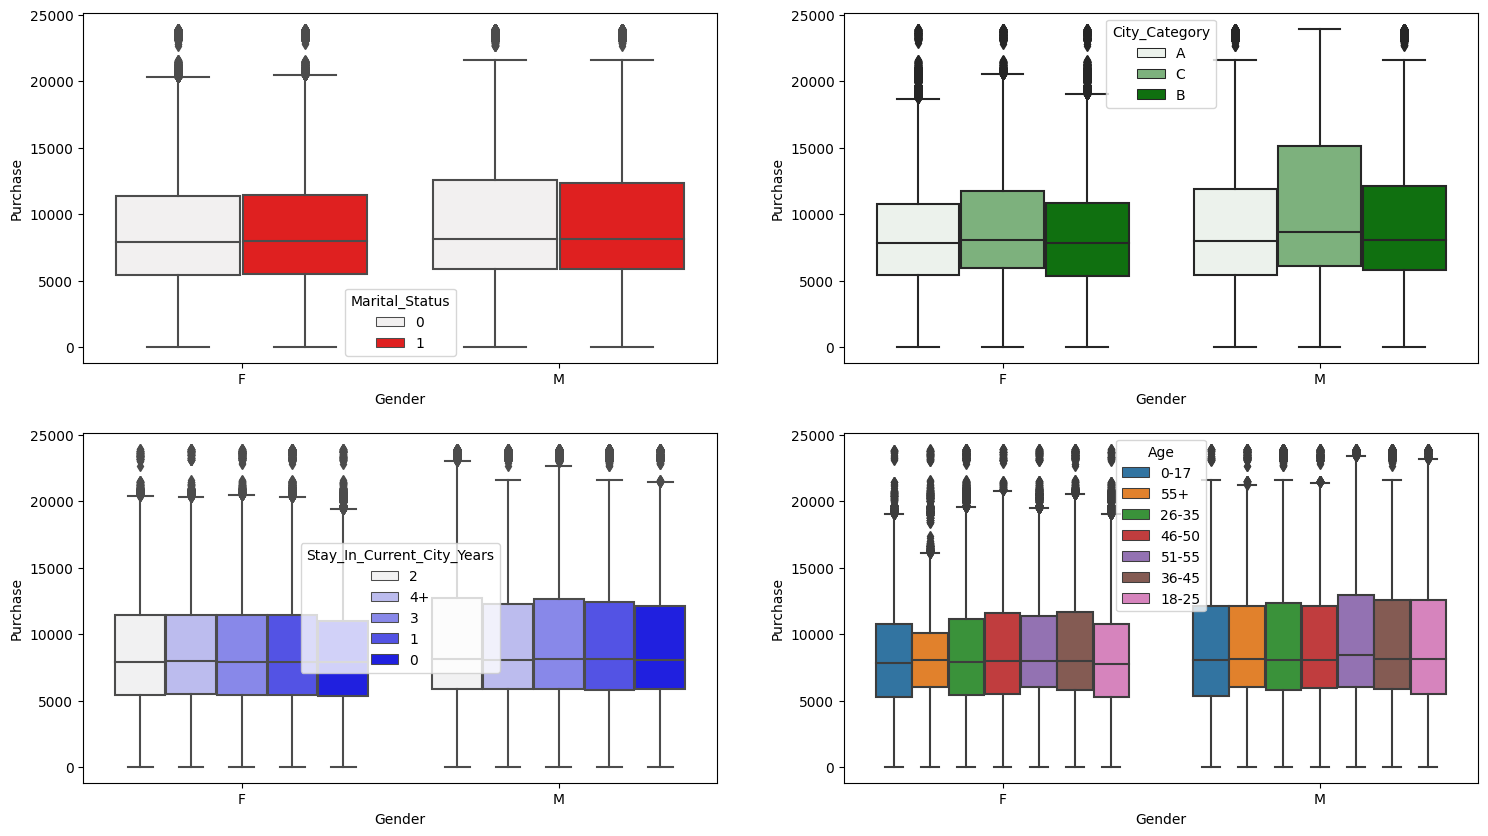

In [ ]:

fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize=(18,10))
sns.boxplot(data = df, x= 'Gender', y='Purchase',hue= 'Marital_Status',ax=ax[0,0],color = 'red')
sns.boxplot(data = df, x= 'Gender', y='Purchase',hue= 'City_Category',ax=ax[0,1],color = 'green')
sns.boxplot(data = df, x= 'Gender', y='Purchase',hue= 'Stay_In_Current_City_Years',ax=ax[1,0],color = 'blue')
sns.boxplot(data = df, x= 'Gender', y='Purchase',hue= 'Age',ax=ax[1,1])

plt.show()

HEARMAP AND PAIRPLOT

<ipython-input-180-1440fe30e84d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth=.5, cmap = 'coolwarm')


<Axes: >

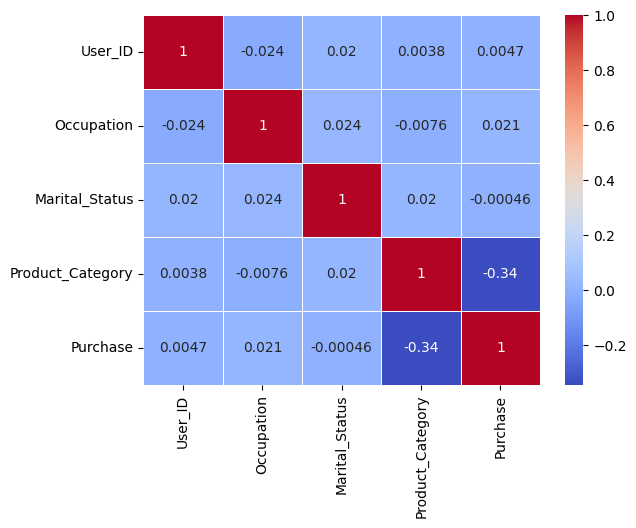

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidth=.5, cmap = 'coolwarm')

CONCLUSION:

* There is no high Positive correlation among the columns that is no strong correlation. But the weak positive correlation between purchase and occupation

* High Negative Correlation which is (-0.0076) in between Product Category and Occupation.

* Slight Positive Correlation which is (0.021) in between Purchase and Occupation.

* Negative Correlation which is (-0.34)in between Product Category and Purchase.

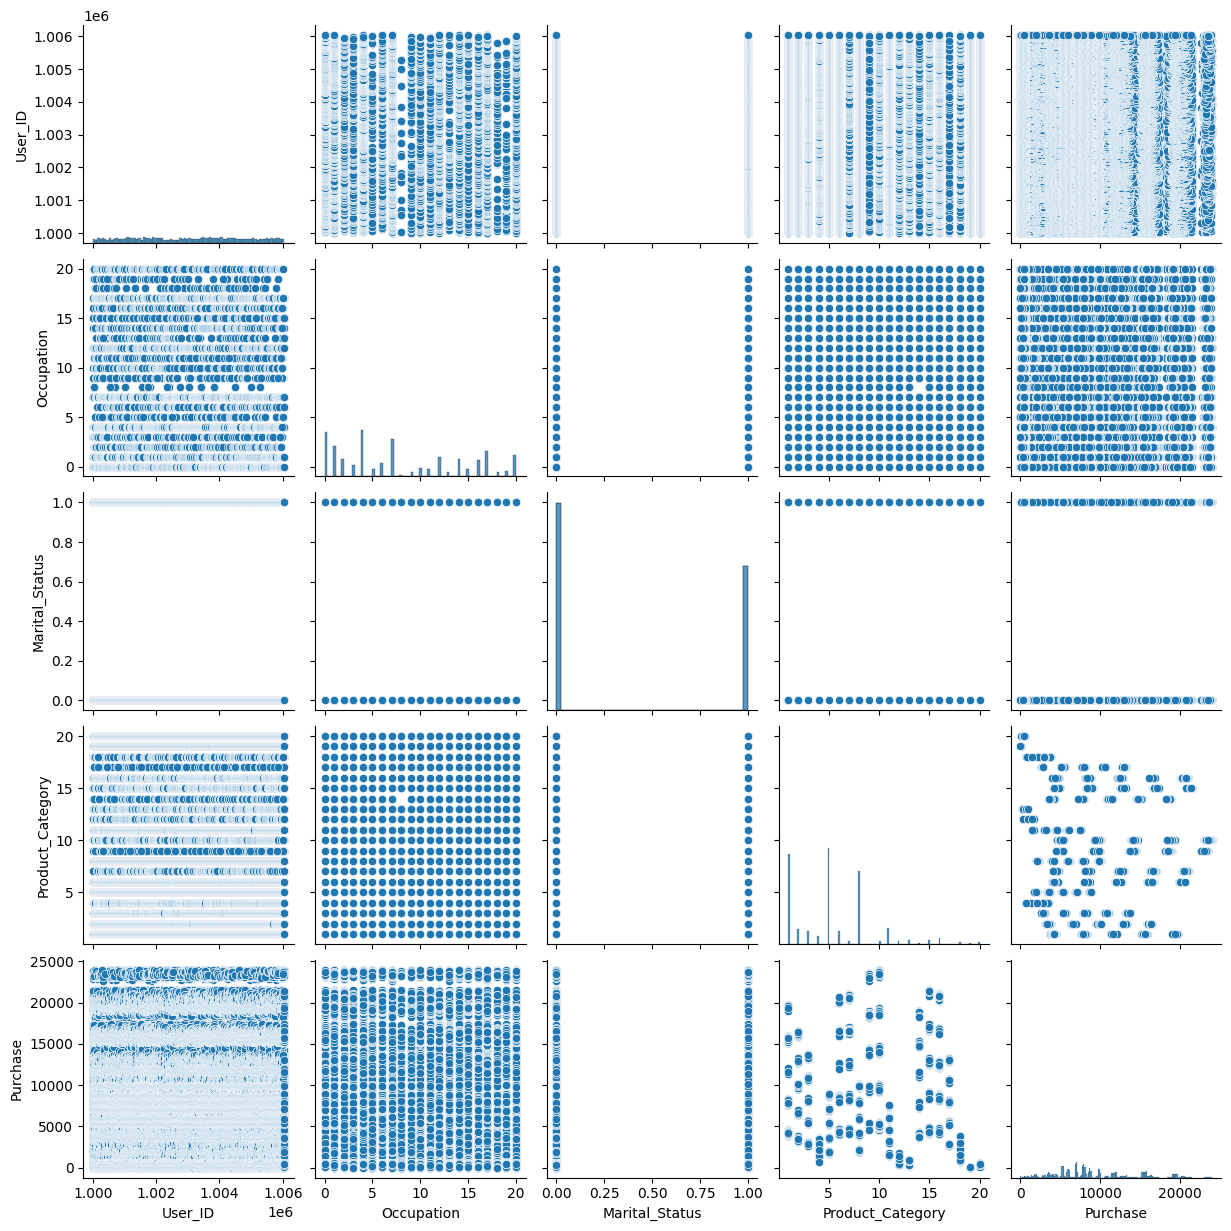

In [ ]:
sns.pairplot(df)
plt.show()

# SOME DATA EXPOLARATION QUESTIONS

In [ ]:
avg_spent = df.groupby(['User_ID','Gender'])['Purchase'].sum()
avg_spent=avg_spent.reset_index()
avg_spent

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
# Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average?

male_avg =avg_spent[avg_spent['Gender'] == 'M']['Purchase'].mean()
female_avg =avg_spent[avg_spent['Gender'] == 'F']['Purchase'].mean()
print(f'AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION MALE CUSTOMERS IS {male_avg.round(2)}')
print(f'AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION FEMALE CUSTOMERS IS {female_avg.round(2)}')

AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION MALE CUSTOMERS IS 925344.4
AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION FEMALE CUSTOMERS IS 712024.39


**Conclusion:**

We can observe that male customer are more tha female customers that is Male customer count is 414259, and female customer count is 135809.

In [ ]:
# Total spending or the Purchases made by the customers
total_spent = pd.crosstab(index = avg_spent['Gender'],values = avg_spent['Purchase'],columns = 'Total Purchases',aggfunc = 'sum')
total_spent['Percentage'] = total_spent['Total Purchases'] / total_spent['Total Purchases'].sum() * 100
total_spent.round(2)

col_0,Total Purchases,Percentage
Gender,,
F,1186232642,23.28
M,3909580100,76.72


**Inference after computing the average female and male expenses**
* We can infer that total amount spent or Purchases by the females is 1186232642 that is 23.28 percentage which is way less from male overall purchasing of 3909580100 that is around 76.72 percentage.
*   We can also clearly infer that average amount spent by males are very high that is around 925344.4 in comparison with females which are having around 712024.39.
*   Most of the unique values are present for Males is greater than Females.


**CONCLUSION:**

We can oberve that Male total spending is more in comparison with Females

In [ ]:
# create seperate dataframe for male and female
male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

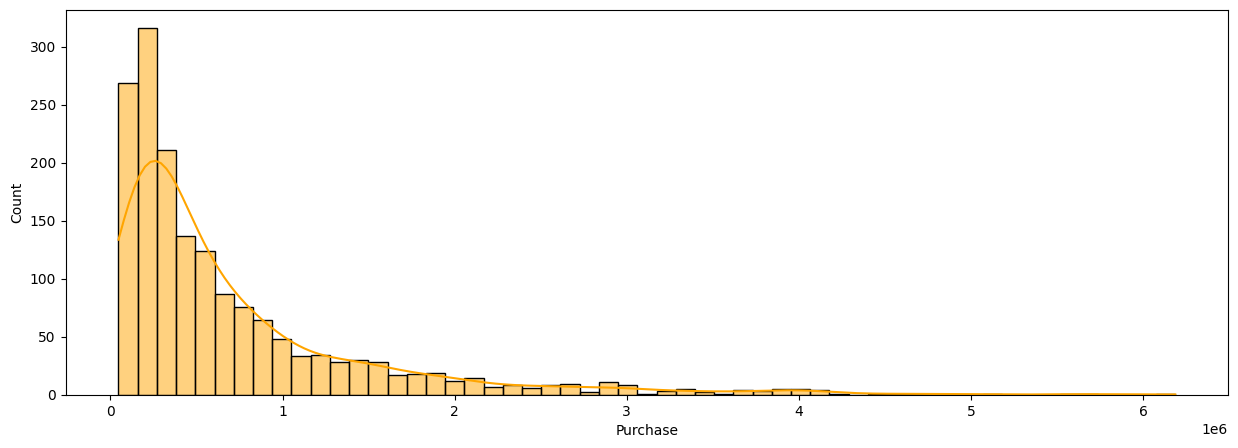

In [ ]:
# Average spending of females
plt.figure(figsize = (15,5))
sns.histplot(data=avg_spent[avg_spent['Gender']=='F']['Purchase'],kde = True,bins = 'auto',color = 'orange')
plt.show()

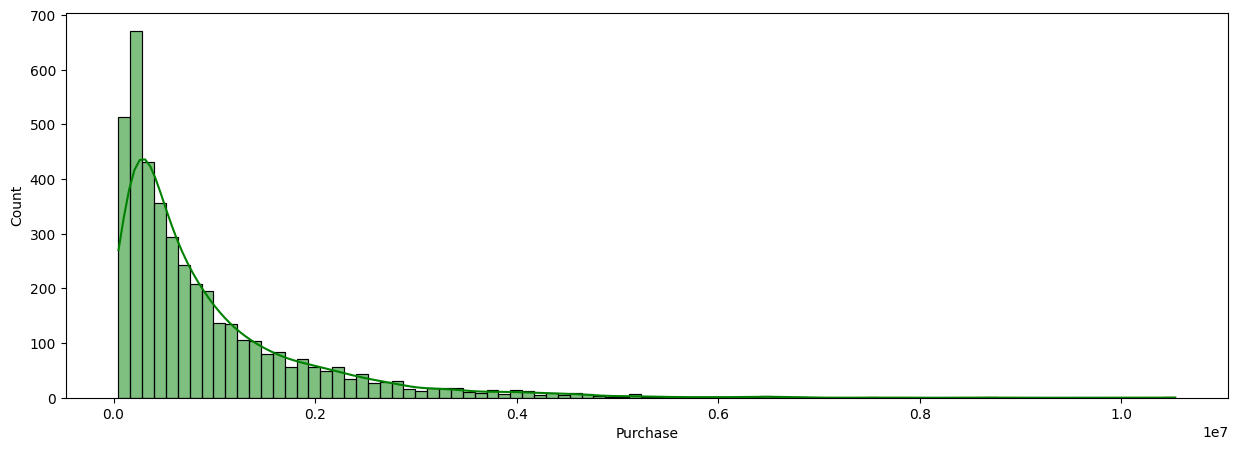

In [ ]:
# Average spending of females
plt.figure(figsize = (15,5))
sns.histplot(avg_spent[avg_spent['Gender']=='M']['Purchase'],kde = True,bins = 'auto',color = 'green')
plt.show()

# CONFIDENCE INTERVAL


Q.--> **Use the sample average to find out an interval within which the population average will lie.**

(Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.)

In [ ]:
# computing sample average for male and female
male_spent = avg_spent[avg_spent['Gender'] == 'M']
female_spent = avg_spent[avg_spent['Gender'] == 'F']
gender = ['M','F']

# let
sample_size  = 1000
num_repetition = 1000

total_male_means = []
total_female_means = []

for _ in range(num_repetition):
  male_mean = male_spent.sample(male_sample_size, replace= True)['Purchase'].mean()
  female_mean = female_spent.sample(female_sample_size, replace= True)['Purchase'].mean()

  total_male_means.append(male_mean)
  total_female_means.append(female_mean)

NameError: ignored

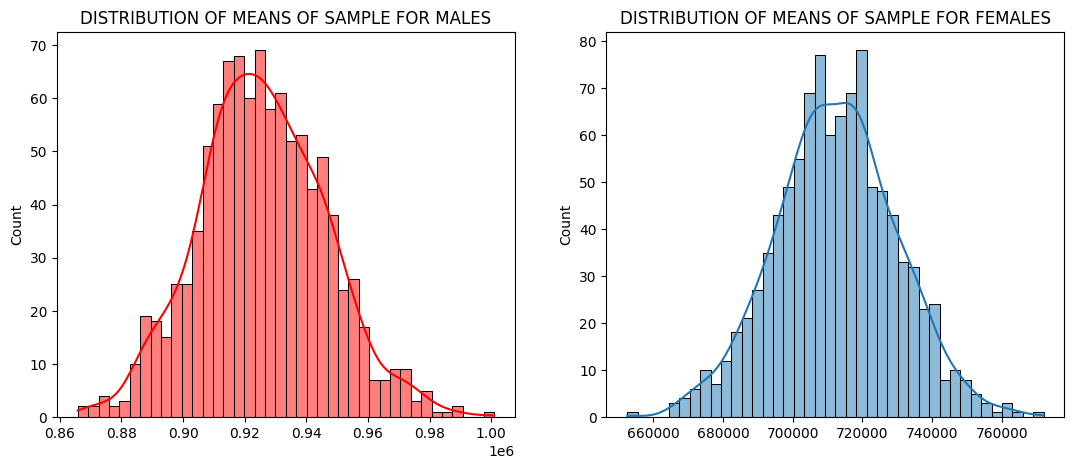

In [ ]:
plt.figure(figsize =(13,5))
plt.subplot(1,2,1)
sns.histplot(total_male_means, bins=40, kde=True,color = 'red').set_title('DISTRIBUTION OF MEANS OF SAMPLE FOR MALES')

plt.subplot(1,2,2)
sns.histplot(total_female_means,bins = 40, kde =True).set_title('DISTRIBUTION OF MEANS OF SAMPLE FOR FEMALES')

plt.show()

In [ ]:
# average of sample customers
sample_male_avg = np.mean(total_male_means).round(2)
sample_female_avg = np.mean(total_female_means).round(2)

print(f"The average spending of male customers: {sample_male_avg:.2f}")
print(f"The average spending of female customers: {sample_female_avg:.2f}")

The average spending of male customers: 925652.56
The average spending of female customers: 712393.36


**CONCLUSION:**

Both the distribution of Purchase for male and female (means of sample means) follows normal distrbution.
We can observe that male purchase ranges from 9200 to 9700
(99.7 % of data lies in this range).
Wherease for female purchase ranges from 8400 to 9000,
which is comparitively low from males purchase.

Q--> **Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.**

In [ ]:
# using describe all the statistical summary for Male and females
stat = avg_spent.groupby('Gender')['Purchase'].describe()
stat = stat.round(3)
stat

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,1666.0,712024.395,807370.726,46681.0,202654.75,407263.0,873772.0,6187094.0
M,4225.0,925344.402,985830.101,49288.0,258589.00,578540.0,1215237.0,10536909.0


**CALCULATING 90 % CONFIDENCE INTERVAL FOR 1000 SAMPLE SIZE**

In [ ]:
#90% Confidence Interval
z90 = norm.ppf(0.90+0.05)
z90 = z90.round(3)
z90

1.645

In [ ]:
# Population mean
print(f'POPULATION AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : {stat["mean"][0]}')
print(f'POPULATION AVERAGE EXPENSES BY THE MALE CUSTOMERS : {stat["mean"][1]}')

POPULATION AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : 712024.395
POPULATION AVERAGE EXPENSES BY THE MALE CUSTOMERS : 925344.402


In [ ]:
# Population standard deviatioin
print(f'POPULATION AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : {stat["std"][0]}')
print(f'POPULATION AVERAGE EXPENSES BY THE MALE CUSTOMERS : {stat["std"][1]}')

POPULATION AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : 807370.726
POPULATION AVERAGE EXPENSES BY THE MALE CUSTOMERS : 985830.101


In [ ]:
# Sample mean
print(f'SAMPLE AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : {sample_female_avg}')
print(f'SAMPLE AVERAGE EXPENSES BY THE MALE CUSTOMERS : {sample_male_avg}')

SAMPLE AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : 712393.36
SAMPLE AVERAGE EXPENSES BY THE MALE CUSTOMERS : 925652.56


In [ ]:
# Sample standard deviation
print(f'SAMPLE AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : {np.std(total_male_means).round(2)}')
print(f'SAMPLE AVERAGE EXPENSES BY THE MALE CUSTOMERS : {np.std(total_female_means).round(2)}')

SAMPLE AVERAGE EXPENSES BY THE FEMALE CUSTOMERS : 20603.08
SAMPLE AVERAGE EXPENSES BY THE MALE CUSTOMERS : 17336.9


In [ ]:
# sample standard error
print("Sample std error for Male: {:.2f}".format(pd.Series(total_male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(total_female_means).std()/np.sqrt(1000)))

Sample std error for Male: 651.85
Sample std error for Female: 548.52



In [ ]:
sample_mean_male=np.mean(total_male_means)
sample_mean_female=np.mean(total_female_means)

sample_std_male=pd.Series(total_male_means).std()
sample_std_female=pd.Series(total_female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

# calculate the upper limit and lower limit to get confidence interval range

# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
Upper_Limit_male=sample_mean_male + (z90 * (sample_std_error_male))
Lower_Limit_male=sample_mean_male - (z90 * (sample_std_error_male))

Upper_Limit_female = sample_mean_female + (z90 * (sample_std_error_female))
Lower_Limit_female= sample_mean_female - (z90 * (sample_std_error_female))

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [924580.2614771579, 926724.8570168694]
Female_CI:  [711491.0521836329, 713295.6672416764]


CONCLUSION:

The Confidence interval at 90% for customer :

* Average Expenses/Amount spend by male customers lie in the range [924891.2912323372 , 926727.8333889961]

* Average Expenses/Amount spend by female customers lie in range [711189.8189023823,  713369.6232216178]


**CALCULATING 95 % CONFIDENCE INTERVAL FOR 1000 SAMPLE SIZE**

In [ ]:
# z = norm.ppf((1 + confidence_level) / 2)
z95 = norm.ppf((1 + 0.95)/2)
z95 = z95.round(3)
z95

1.96

In [ ]:
sample_mean_male=np.mean(total_male_means)
sample_mean_female=np.mean(total_female_means)

sample_std_male=pd.Series(total_male_means).std()
sample_std_female=pd.Series(total_female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

# calculate the upper limit and lower limit to get confidence interval range

# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
Upper_Limit_male =  sample_mean_male + z95 * sample_std_error_male
Lower_Limit_male = sample_mean_male - z95 * sample_std_error_male

Upper_Limit_female = sample_mean_female + z95 * (sample_std_error_female)
Lower_Limit_female = sample_mean_female - z95 * (sample_std_error_female)

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [924374.9278616536, 926930.1906323737]
Female_CI:  [711318.2698908414, 713468.4495344678]


CONCLUSION:

The Confidence interval at 95% for customer :

* Average Expenses/Amount spend by male customers lie in the range [924715.4520896785, 926903.6725316548]

* Average Expenses/Amount spend by female customers lie in range [710981.1142335193, 713578.3278904808]

**CALCULATING 99 % CONFIDENCE INTERVAL FOR 1000 SAMPLE SIZE**

In [ ]:
# z = norm.ppf((1 + confidence_level) / 2)
z99 = norm.ppf((1 + 0.99)/2)
z99 = z99.round(3)
z99

2.576

In [ ]:
sample_mean_male=np.mean(total_male_means)
sample_mean_female=np.mean(total_female_means)

sample_std_male=pd.Series(total_male_means).std()
sample_std_female=pd.Series(total_female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

# calculate the upper limit and lower limit to get confidence interval range

# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
Upper_Limit_male =  sample_mean_male + (z99 * (sample_std_error_male))
Lower_Limit_male = sample_mean_male - (z99 * (sample_std_error_male))

Upper_Limit_female = sample_mean_female + (z99 * (sample_std_error_female))
Lower_Limit_female = sample_mean_female - (z99 * (sample_std_error_female))

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [923973.3865691118, 927331.7319249155]
Female_CI:  [710980.3845182717, 713806.3349070376]


CONCLUSION:

The Confidence interval at 95% for customer :

* Average Expenses/Amount spend by male customers lie in the range [924371.5888773679, 927247.5357439654]

* Average Expenses/Amount spend by female customers lie in range [710572.9806588539, 713986.4614651462]

LETS CALCULATE THE CONFIDENCE INTERVAL FOR MALE AND FEMALE CUSTOMER AT DIFFERENT SAMPLE SIZE (1500)

In [ ]:
#Finding the sample(sample size=1000) avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1500

num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_spent.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = female_spent.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

In [ ]:
# Population mean
print("Population average expenses for Male: {:.2f}".format(male_spent['Purchase'].mean()))
print("Population average expenses for Female: {:.2f}\n".format(female_spent['Purchase'].mean()))

# Sample mean
print("Sample average expenses for Male: {:.2f}".format(np.mean(male_means)))
print("Sample average expenses for Female: {:.2f}\n".format(np.mean(female_means)))

# Sample standard deviation
print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

# Sample standard error
print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Population average expenses for Male: 925344.40
Population average expenses for Female: 712024.39

Sample average expenses for Male: 926643.69
Sample average expenses for Female: 712297.62

Sample std for Male: 25482.19
Sample std for Female: 20897.99

Sample std error for Male: 657.95
Sample std error for Female: 539.58



**Calculate the confidence interval for customers at the given values for z at 90% confidence interval.**

In [ ]:
# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
# At 90 % confidence
z90 = norm.ppf((1 + 0.90)/2)
z90 = z90.round(3)
z90

Upper_Limit_male =  sample_mean_male + (z90 * (sample_std_error_male))
Lower_Limit_male = sample_mean_male - (z90 * (sample_std_error_male))

Upper_Limit_female = sample_mean_female + (z90 * (sample_std_error_female))
Lower_Limit_female = sample_mean_female - (z90 * (sample_std_error_female))


print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [925561.3689621063, 927726.0157725606]
Female_CI:  [711410.0063864711, 713185.2368708622]


CONCLUSION:

The Confidence interval at 90% for customer :

* Average Expenses/Amount spend by male customers lie in the range [924099.8440345549, 926302.5730507784]
* Average Expenses/Amount spend by female customers lie in the range [710895.2505512054, 712679.7341114613]

In [ ]:
# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
# At 95 % confidence

z95= norm.ppf((1 + 0.95)/2)
z95 = z95.round(3)
z95

Upper_Limit_male =  sample_mean_male + (z95 * (sample_std_error_male))
Lower_Limit_male = sample_mean_male - (z95 * (sample_std_error_male))

Upper_Limit_female = sample_mean_female + (z95 * (sample_std_error_female))
Lower_Limit_female = sample_mean_female - (z95 * (sample_std_error_female))


print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [925354.1155440841, 927933.2691905828]
Female_CI:  [711240.037510306, 713355.2057470273]


CONCLUSION:

The Confidence interval at 95% for customer :

* Average Expenses/Amount spend by male customers lie in the range[923888.9444478953, 926513.472637438]
* Average Expenses/Amount spend by female customers lie in the range [710724.3957422447, 712850.588920422]

In [ ]:
# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
# At 99 % confidence
z99 = norm.ppf((1 + 0.99)/2)
z99 = z99.round(3)
z99

Upper_Limit_male =  sample_mean_male + (z99 * (sample_std_error_male))
Lower_Limit_male = sample_mean_male - (z99 * (sample_std_error_male))

Upper_Limit_female = sample_mean_female + (z99 * (sample_std_error_female))
Lower_Limit_female = sample_mean_female - (z99 * (sample_std_error_female))


print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [924948.8199710628, 928338.5647636041]
Female_CI:  [710907.6539302497, 713687.5893270836]


CONCLUSION:

The Confidence interval at 99% for customer :

* Average Expenses/Amount spend by male customers lie in the range [923476.5185895385, 926925.8984957947]
* Average Expenses/Amount spend by female customers lie in the range [710390.2796713883, 713184.7049912784]

# CLT AND CONFIDENCE INTERVAL FOR MARITAL STATUS:

In [ ]:
avg_marital = df.groupby(['User_ID','Marital_Status'])['Purchase'].sum()
avg_marital = avg_marital.reset_index()
avg_marital

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
avgamt_married = avg_marital[avg_marital['Marital_Status'] == 1]
avgamt_single = avg_marital[avg_marital['Marital_Status'] == 0]
avgamt_married, avgamt_single

(      User_ID  Marital_Status  Purchase
 3     1000004               1    206468
 4     1000005               1    821001
 6     1000007               1    234668
 7     1000008               1    796593
 9     1000010               1   2169510
 ...       ...             ...       ...
 5879  1006029               1    157436
 5880  1006030               1    737361
 5883  1006033               1    501843
 5886  1006036               1   4116058
 5889  1006039               1    590319
 
 [2474 rows x 3 columns],
       User_ID  Marital_Status  Purchase
 0     1000001               0    334093
 1     1000002               0    810472
 2     1000003               0    341635
 5     1000006               0    379930
 8     1000009               0    594099
 ...       ...             ...       ...
 5884  1006034               0    197086
 5885  1006035               0    956645
 5887  1006037               0   1119538
 5888  1006038               0     90034
 5890  1006040               

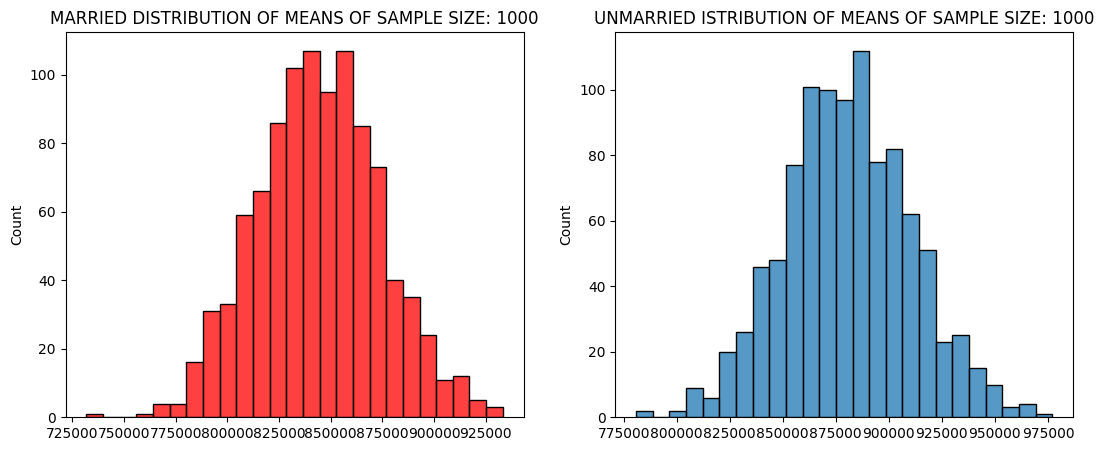

In [ ]:
# average expenses of customer depending upon their marital status
sample_size = 1000
num_repitions = 1000

married_means = []
single_means = []

for i in range(num_repitions):
    avg_married = avg_marital[avg_marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_marital[avg_marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    single_means.append(avg_single)

plt.figure(figsize =(13,5))
plt.subplot(1,2,1)
sns.histplot(married_means, bins='auto',color = 'red').set_title("MARRIED DISTRIBUTION OF MEANS OF SAMPLE SIZE: 1000")

plt.subplot(1,2,2)
sns.histplot(single_means, bins='auto').set_title("UNMARRIED ISTRIBUTION OF MEANS OF SAMPLE SIZE: 1000")

plt.show()


**CONCLUSION:**

From above we can conclude thath the sample seems to be normally distributed for both married and singles customers. And Also, we can observe that the mean of the sample means are closer to the population mean as per central limit theorem.

In [ ]:
avg_marital['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

**CONCLUSION:**

From this we that comment that the most of the unique count of occurrences is for the Unmarried customers is high that is around 3417 in comparison to singles which are having count of 2474.


**CALCULATING 90 % CONFIDENCE INTERVAL FOR AVERAGE EXPENSES FOR THE UNMARRIED AND SINGLES HAVING 1000 SAMPLE SIZE**

In [ ]:
# At 90 % confidende
z90 = norm.ppf((1 + 0.90)/2)
z90 = z90.round(3)
z90

1.645

In [ ]:

# Population mean
print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

# Sample mean
print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

# sample standard deviation
print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

# standard error
print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000)))
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 844166.23
Sample avg spend amount for Single: 880604.61

Sample std for Married: 29956.09
Sample std for Single: 30199.13

Sample std error for Married: 947.29
Sample std error for Single: 954.98



In [ ]:
# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
Upper_Limit_married = (sample_mean_married + (z90 * (sample_std_error_male)))
Lower_Limit_married = (sample_mean_married - (z90 * (sample_std_error_married)))

Upper_Limit_single = (sample_mean_single + (z90 * (sample_std_error_single)))
Lower_Limit_single = (sample_mean_single - (z90 * (sample_std_error_single)))

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Married_CI:  [842607.9345594873, 845248.5578862272]
Single_CI:  [879033.6687164486, 882175.5537475513]



**CALCULATING 95 % CONFIDENCE INTERVAL FOR AVERAGE EXPENSES FOR THE UNMARRIED AND SINGLES HAVING 1000 SAMPLE SIZE**

In [ ]:
# At 90 % confidende
z95 = norm.ppf((1 + 0.95)/2)
z95 = z95.round(3)
z95

1.96

In [ ]:
# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
Upper_Limit_married = (sample_mean_married + (z95 * (sample_std_error_male)))
Lower_Limit_married = (sample_mean_married - (z95 * (sample_std_error_married)))

Upper_Limit_single = (sample_mean_single + (z95 * (sample_std_error_single)))
Lower_Limit_single = (sample_mean_single - (z95 * (sample_std_error_single)))

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Married_CI:  [842309.5367021763, 845455.8113042493]
Single_CI:  [878732.8499368749, 882476.372527125]



**CALCULATING 99 % CONFIDENCE INTERVAL FOR AVERAGE EXPENSES FOR THE UNMARRIED AND SINGLES HAVING 1000 SAMPLE SIZE**

In [ ]:
# At 90 % confidende
z99 = norm.ppf((1 + 0.99)/2)
z99 = z99.round(3)
z99

2.576

In [ ]:
# calculate confidence interrval using formula CI = mean(sample) + (z(confidence percentage) * sample standard error)
Upper_Limit_married = (sample_mean_married + (z99 * (sample_std_error_male)))
Lower_Limit_married = (sample_mean_married - (z99 * (sample_std_error_married)))

Upper_Limit_single = (sample_mean_single + (z99 * (sample_std_error_single)))
Lower_Limit_single = (sample_mean_single - (z99 * (sample_std_error_single)))

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Married_CI:  [841726.0031145461, 845861.1068772706]
Single_CI:  [878144.5821012643, 883064.6403627356]


# CLT AND CONFIDENCE INTERVAL FOR AGE:

In [ ]:
avgamt_age = df.groupby(['User_ID','Age'])['Purchase'].sum()
avgamt_age = avgamt_age.reset_index()
avgamt_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

    for _ in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)

print(all_sample_means)

{'26-35': [1023682.435, 1086242.23, 1044851.845, 995815.045, 955169.42, 1043607.44, 997138.49, 1030286.225, 1034575.075, 1025013.76, 889192.47, 1027824.325, 1014726.735, 890121.52, 956841.38, 869300.135, 983616.77, 927480.045, 1054928.91, 885214.82, 959710.23, 969295.66, 901167.985, 977285.215, 1040199.165, 1052710.02, 1106833.065, 1043888.395, 987441.51, 1075105.46, 1042991.005, 994995.415, 952413.235, 915884.755, 1056670.45, 979305.57, 876932.33, 1048820.575, 1050764.995, 1039959.45, 1138328.945, 986593.605, 996208.435, 1024419.135, 1023702.15, 1041001.69, 1050063.835, 1047631.3, 1040951.885, 907874.755, 1024723.195, 1043695.89, 890483.79, 1032243.35, 971952.85, 959099.11, 908503.225, 1021084.745, 956805.925, 957222.86, 957649.51, 1102874.99, 1049096.85, 1017546.64, 1022968.16, 959060.53, 876905.12, 934171.645, 893972.935, 1098540.695, 1022780.81, 1037299.83, 982566.91, 1094601.625, 1001078.155, 1041235.3, 983115.47, 1065969.375, 1155206.11, 1063795.44, 1023041.635, 946176.61, 896952

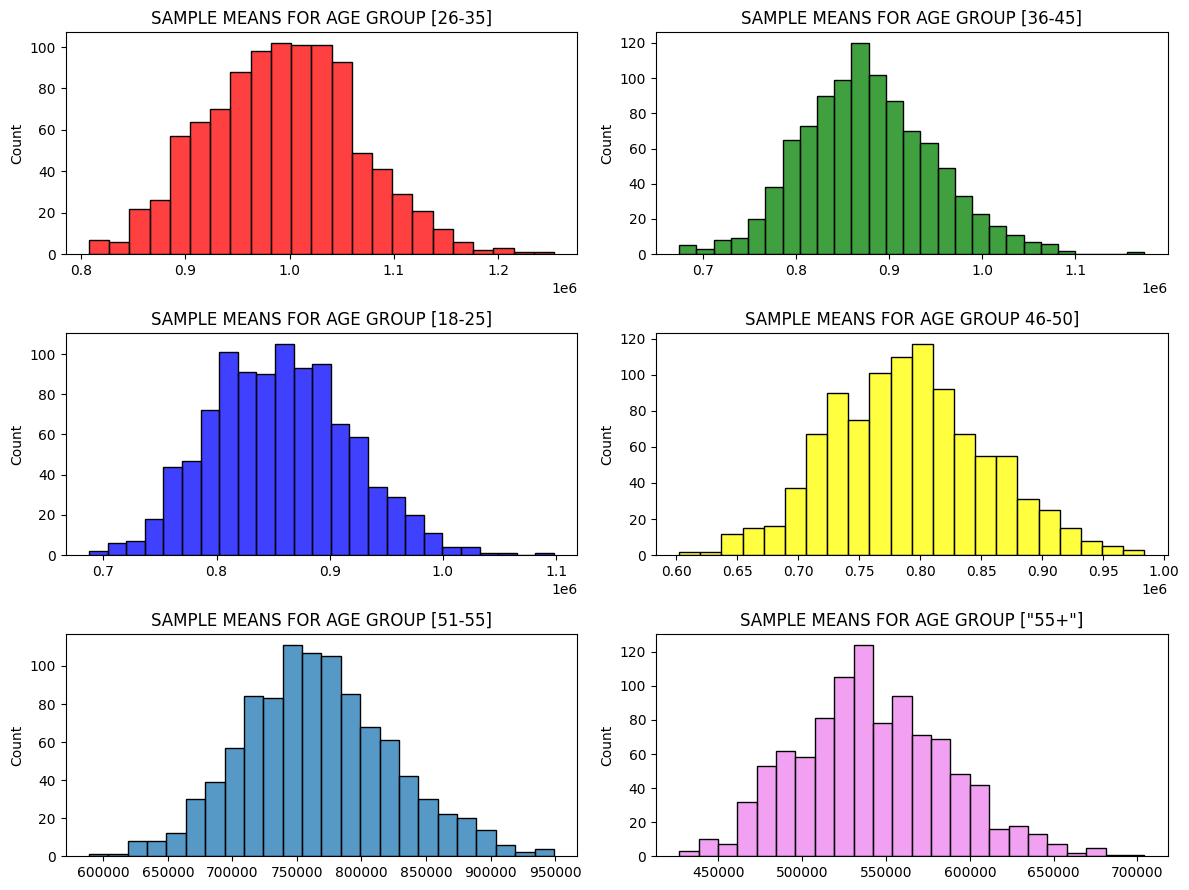

In [ ]:
plt.figure(figsize=(12,9))

plt.subplot(3,2,1)
sns.histplot(all_sample_means['26-35'],bins='auto',color='red').set_title('SAMPLE MEANS FOR AGE GROUP [26-35]')
plt.subplot(3,2,2)
sns.histplot(all_sample_means['36-45'],bins='auto',color='green').set_title('SAMPLE MEANS FOR AGE GROUP [36-45]')
plt.subplot(3,2,3)
sns.histplot(all_sample_means['18-25'],bins='auto',color='blue').set_title('SAMPLE MEANS FOR AGE GROUP [18-25]')
plt.subplot(3,2,4)
sns.histplot(all_sample_means['46-50'],bins='auto',color='yellow').set_title('SAMPLE MEANS FOR AGE GROUP 46-50]')
plt.subplot(3,2,5)
sns.histplot(all_sample_means['51-55'],bins='auto').set_title('SAMPLE MEANS FOR AGE GROUP [51-55]')
plt.subplot(3,2,6)
sns.histplot(all_sample_means['55+'],bins='auto',color='violet').set_title('SAMPLE MEANS FOR AGE GROUP ["55+"]')

plt.tight_layout()
plt.show()

**CALCULATING 90% CONFIENCE INTERVAL OF AVERAGE EXPENSES OF CUSTOMER FRO DIFFERENT AGEE GROUP WITH SAMPLE SIZE OF 200.**

In [ ]:
# AT 90% Confidence Interval

z90 = norm.ppf((1 + 0.90)/2)
z90 = z90.round(3)
z90

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=avgamt_age[avgamt_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print(' ')
print("\n")

for i in age_intervals:
    for j in range(num_repitions):

        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)


for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}
 


For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


**CALCULATING 95% CONFIENCE INTERVAL OF AVERAGE EXPENSES OF CUSTOMER FRO DIFFERENT AGEE GROUP WITH SAMPLE SIZE OF 200.**

In [ ]:
# AT 95% Confidence Interval

z95 = norm.ppf((1 + 0.95)/2)
z95 = z95.round(3)
z95

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


**CALCULATING 99% CONFIENCE INTERVAL OF AVERAGE EXPENSES OF CUSTOMER FRO DIFFERENT AGEE GROUP WITH SAMPLE SIZE OF 200.**

In [ ]:
# AT 99% Confidence Interval
z99 = norm.ppf((1 + 0.99)/2)
z99 = z99.round(3)
z99

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


#INSIGHTS



*   APPROX 75 % OF CUSTOMERS IS OF MALE AND 25% CUSTOMERS ARE  FEMALE

*   APPROX 80% OF THE CUSTOMERS AGE IS BETWEEN 18-50 (2% : 0-17, 18% :18-25, 19% :36-45,40%: 26-35)

*   TOTAL OF 20 PRODUCT CATEGORIES ARE THERE.

*  THERE ARE 20 DIFFERENT TYPES OF OCCUPATIONS IN THE CITY.

*   THERE ARE MORE MALE CUSTOMER THAN FEMALES
*  APPROX ~ 35% STAYING IN CITY FROM 1 YEAR, 18% FROM 2 YEAR, 17% FROM 3 YEAR

*   60 % ARE SINGLE AND 40 % ARE MARRIED

*   26 % FROM CITY A, 42 % FROM CITY B, 31 % FROM CITY C

*  AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION MALE CUSTOMERS IS 925344.40.

*  AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION FEMALE CUSTOMERS IS 712024.39



*  CONFIDENCE INTERVAL BY GENDER(USING CENTRAL LIMIT THEOREM):

1. AT 95 % CONFIDENCE LEVEL ,WE CAN CONCLUDE THAT WE ARE 95% CONFIDENET THAT AVERAGE AMOUNT SPENT BY THE 50 MILLION MALE CUSTOMERS WILL FALL/LIE IN THE RANGE OF ([924529.65784535, 927204.6467441048])
2. AND THE TRUE AVERAGE AMOUNT SPENT BY THE 50 MILLION FEMALE CUSTOMERS WILL LIE IN THE RANGE OF ([710631.2762485746, 713082.4331834117])

* CONFIDENCE INTERVAL BY MARITAL STATUS AT 95% CONFIDENCE INTERVAL:
1. AT 95 % CONFIDENCE LEVEL ,WE CAN CONCLUDE THAT WE ARE 95% CONFIDENET THAT AVERAGE AMOUNT SPENT BY THE MARRIED CUSTOMERS WILL FALL/LIE IN THE RANGE OF ([840743.6483680079, 843761.4896992799])
2. AND THE TRUE AVERAGE AMOUNT SPENT BY THE SINGLE CUSTOMERS WILL LIE IN THE RANGE OF ([878083.1058069419, 881816.3394010582])

*  CONFIDENCE INTERVAL BY AGE AT 95% CONFIDENCE INTERVAL
1. For age 26-35 confidence interval of means: (945034.42, 1034284.21)
2. For age 36-45 confidence interval of means: (823347.80, 935983.62)
3. For age 18-25 confidence interval of means: (801632.78, 908093.46)
4. For age 46-50 confidence interval of means: (713505.63, 871591.93)
5. For age 51-55 confidence interval of means: (692392.43, 834009.42)
6. For age 55+   confidence interval of means: (476948.26, 602446.23)
7. For age 0-17  confidence interval of means: (527662.46, 710073.17)


# RECOMMENDATAION



*   GENDER:

COMPANY NEEDS TO FOCUS MORE ON THE FEMALE CUSTOMER (AS WOMEN SPENT LESS MAN)AND PRIORITIZE RETAINING AND ATTRACTING MORE MALE CUSTOMERS.

*   CUSOTMER AGE GROUP:

CUSTOMER WHO FALL UNDER THE AGE CATEGORY OF 18-50 ARE MORE LIKELY TO SPEND MONEY THAN OTHERS.SO NEEDS TO FOCUS ON THE ACCESSING MORE CUSTOMERS WHO ALL FALL UNDER THIS GROUP.

* CITY CATEGORY:

AS FROM THE ABOVE INSIGHT WE KNOW THAT MOST MOST OF CUSTOMER BELONG TO CITY OF CATEGORY C WHO SPENT MOST OF THE MONEY THAN OTHERS.

SO IF WE INCREASE THE SALE IN CITY C IT WILL BE VERY BENEFICCIAL FOR THE COMPANY GROWTH AND EXPANDING THEIR NETWORK.


*   MARITAL STATUS:

AS UNMARRIED CUSTOMERS/ SINGLE SPEND MOST AMOUNT OF MONEY THAN THE MARRIED CUSOTMERS.SO COMPANY NEED TO FOCUS ON ACQUISATION OF SINGLES CUSTOMERS


*   PRODUCT CATEGORY:

FROM THE ABOVE OBSERVATION WE CAN CONCLUDE THAT CUSTOMER SPEND MOST OF THE MONEY IN PRODUCT CATEGORY 10(MASKED). SO WE NEED TO FOCUS ON THE PRODUCT CATEGORY OF 10 TO GET MORE PROFIT FOR THE COMPANY GROWTH.

